Make simulate data faster using just a unique estimation for each run, and not estimate each time just a single number.

# Set Up

In [3]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from SYN_package.estimate_parameters import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

Cloning into 'thesis'...
remote: Enumerating objects: 1451, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 1451 (delta 104), reused 38 (delta 22), pack-reused 1273
Receiving objects: 100% (1451/1451), 67.59 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (925/925), done.
Mounted at /content/drive


In [18]:

rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_PRO.csv')

fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_news_PRO.csv')

vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_PRO.csv')

gb=pd.read_csv('/content/drive/MyDrive/thesis/data/gab/gab_PRO.csv')



fb=filter_first_h(fb,100)

gb=filter_first_h(gb,100)

rd=filter_first_h(rd,100)

vo=filter_first_h(vo,100)


names = ['Reddit','Voat','Gab','Facebook']
datas = [rd,vo,gb,fb]

## 5.1 Draw Number of users

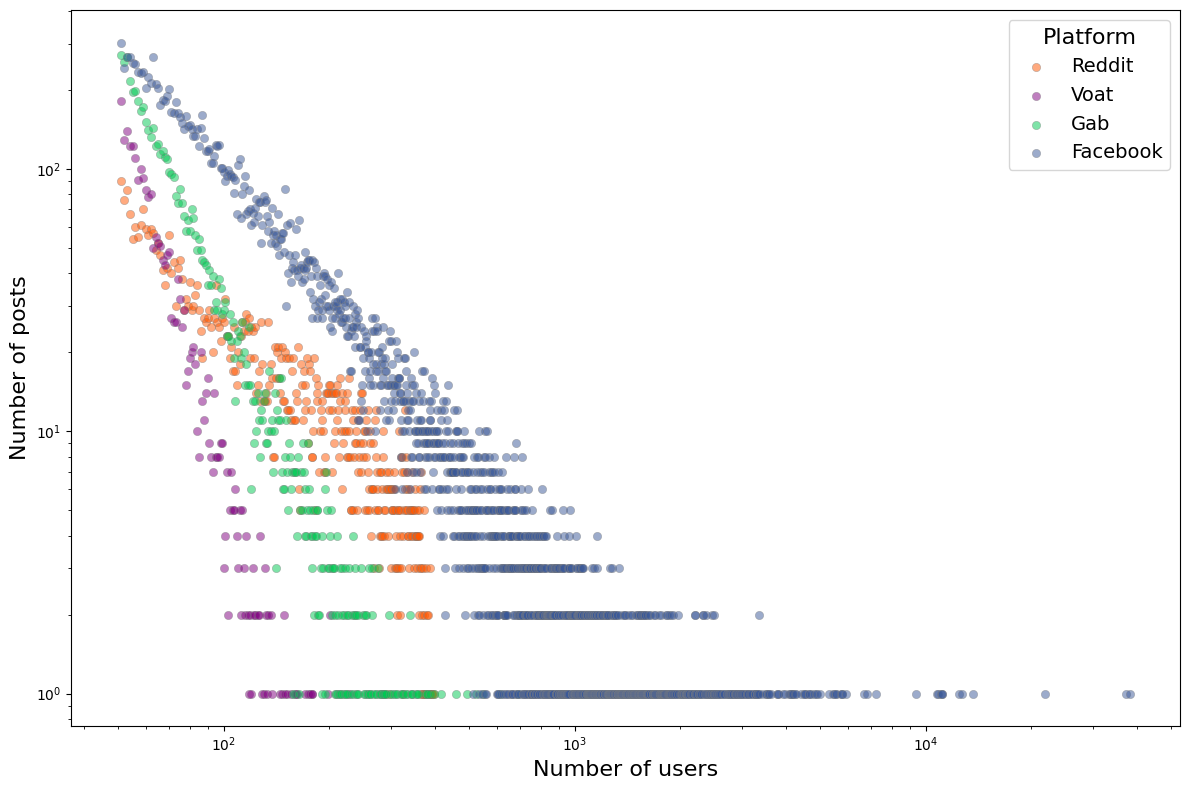

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors
reddit_color = '#FF5700'
voat_color = '#800080'
facebook_color = '#3b5998'
gab_color = '#00c853'

# Group by 'post_id' and count unique 'user_id' for each platform
users_fb = fb.groupby('post_id')['user_id'].nunique().reset_index()
users_rd = rd.groupby('post_id')['user_id'].nunique().reset_index()
users_gb = gb.groupby('post_id')['user_id'].nunique().reset_index()
users_vo = vo.groupby('post_id')['user_id'].nunique().reset_index()

# Rename columns
users_fb.columns = ['post_id', 'user_count']
users_rd.columns = ['post_id', 'user_count']
users_gb.columns = ['post_id', 'user_count']
users_vo.columns = ['post_id', 'user_count']

# Filter to include only posts with more than 50 unique users
users_fb = users_fb[users_fb['user_count'] > 50]
users_rd = users_rd[users_rd['user_count'] > 50]
users_gb = users_gb[users_gb['user_count'] > 50]
users_vo = users_vo[users_vo['user_count'] > 50]

# Count the number of posts with a specific number of unique users
post_count_fb = users_fb.groupby('user_count').size().reset_index(name='post_count')
post_count_rd = users_rd.groupby('user_count').size().reset_index(name='post_count')
post_count_gb = users_gb.groupby('user_count').size().reset_index(name='post_count')
post_count_vo = users_vo.groupby('user_count').size().reset_index(name='post_count')

# Create the scatter plot with log-log scale
plt.figure(figsize=(12, 8))

# Scatter plot for each platform with customized colors and transparency
sns.scatterplot(data=post_count_rd, x='user_count', y='post_count', alpha=0.5, label='Reddit', color=reddit_color, edgecolor='gray')
sns.scatterplot(data=post_count_vo, x='user_count', y='post_count', alpha=0.5, label='Voat', color=voat_color, edgecolor='gray')
sns.scatterplot(data=post_count_gb, x='user_count', y='post_count', alpha=0.5, label='Gab', color=gab_color, edgecolor='gray')
sns.scatterplot(data=post_count_fb, x='user_count', y='post_count', alpha=0.5, label='Facebook', color=facebook_color, edgecolor='gray')

# Set the axes to log scale
plt.xscale('log')
plt.yscale('log')

# Set titles and labels with increased font sizes

plt.xlabel('Number of users', fontsize=16)
plt.ylabel('Number of posts', fontsize=16)

# Remove the grid
plt.grid(False)

# Add the legend with increased font size
plt.legend(title='Platform', fontsize=14, title_fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
gamma=estimate_parameters_U(gb)
print('gb'+str(gamma))
xmin=50
sample_size=10000
# Generate sample
sample = generate_power_law_sample(gamma, xmin, sample_size)

# Convert sample to integers and format as a DataFrame
sample = np.floor(sample).astype(int)
sample_df = pd.DataFrame(sample, columns=['user_count'])
sample_df_gb = sample_df.groupby('user_count').size().reset_index(name='post_count')


gamma=estimate_parameters_U(rd)
print('rd'+str(gamma))
xmin=50
sample_size=10000
# Generate sample
sample = generate_power_law_sample(gamma, xmin, sample_size)

# Convert sample to integers and format as a DataFrame
sample = np.floor(sample).astype(int)
sample_df = pd.DataFrame(sample, columns=['user_count'])
sample_df_rd = sample_df.groupby('user_count').size().reset_index(name='post_count')


gamma=estimate_parameters_U(vo)
print('vo'+str(gamma))
xmin=50
sample_size=10000
# Generate sample
sample = generate_power_law_sample(gamma, xmin, sample_size)

# Convert sample to integers and format as a DataFrame
sample = np.floor(sample).astype(int)
sample_df = pd.DataFrame(sample, columns=['user_count'])
sample_df_vo = sample_df.groupby('user_count').size().reset_index(name='post_count')



gamma=estimate_parameters_U(fb)
print('fb'+str(gamma))
xmin=50
sample_size=10000
# Generate sample
sample = generate_power_law_sample(gamma, xmin, sample_size)

# Convert sample to integers and format as a DataFrame
sample = np.floor(sample).astype(int)
sample_df = pd.DataFrame(sample, columns=['user_count'])
sample_df_fb = sample_df.groupby('user_count').size().reset_index(name='post_count')


gb3.3581436231409034
rd2.1172386372477376
vo4.765796666436497
fb1.920612852062878


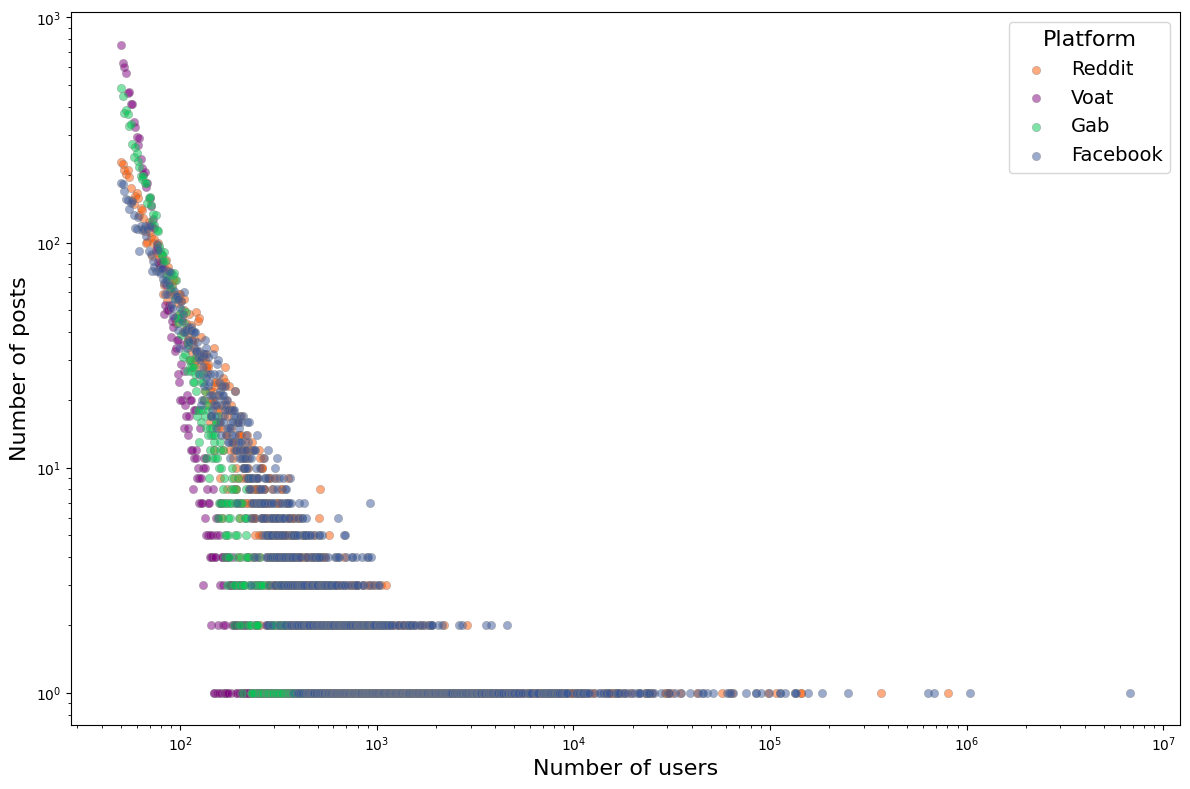

In [ ]:

plt.figure(figsize=(12, 8))

# Scatter plot for each platform with customized colors and transparency
sns.scatterplot(data=sample_df_rd, x='user_count', y='post_count', alpha=0.5, label='Reddit', color=reddit_color, edgecolor='gray')
sns.scatterplot(data=sample_df_vo, x='user_count', y='post_count', alpha=0.5, label='Voat', color=voat_color, edgecolor='gray')
sns.scatterplot(data=sample_df_gb, x='user_count', y='post_count', alpha=0.5, label='Gab', color=gab_color, edgecolor='gray')
sns.scatterplot(data=sample_df_fb, x='user_count', y='post_count', alpha=0.5, label='Facebook', color=facebook_color, edgecolor='gray')









plt.xscale('log')
plt.yscale('log')

# Set titles and labels with increased font sizes
plt.xlabel('Number of users', fontsize=16)
plt.ylabel('Number of posts', fontsize=16)

# Remove the grid
plt.grid(False)

# Add the legend with increased font size
plt.legend(title='Platform', fontsize=14, title_fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## T0

In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import expon
import matplotlib.pyplot as plt

# Definizione della funzione di distribuzione esponenziale per il fitting
def exponential_distribution(x, lambda_exp):
    return expon.pdf(x, scale=1/lambda_exp)

# Funzione per stimare alpha e lambda_sxp
def estimate_alpha_lambda(social):
    # Calcolo delle dimensioni delle interazioni
    interaction_size = social.groupby(['post_id', 'user_id'])['comment_id'].count().reset_index()['comment_id']

    # Calcolo di alpha
    alpha = np.mean(interaction_size == 1)

    # Preparazione dei dati per il fitting dell'esponenziale
    data = interaction_size[interaction_size > 1] - 2

    # Numero di campioni da generare
    n = 1000
    initial_lambda = 0.5  # Modifica questo valore se hai una stima migliore

    # Fitting della distribuzione esponenziale ai dati
    popt, pcov = curve_fit(exponential_distribution, data, np.zeros_like(data) + 1, p0=[initial_lambda])

    # Parametro ottimizzato per lambda
    lambda_exp = popt[0]

    # Generazione dei campioni
    uniform_samples = np.random.uniform(size=n)
    samples = np.where(uniform_samples < alpha, 1, np.round(expon.rvs(scale=1/lambda_exp, size=n) + 2))

    return alpha, lambda_exp

Cerco i parmetri alpha e lambda per ciascuna piatttaforma

In [19]:
import csv


dict_params={}

dict_params['Reddit']=estimate_alpha_lambda(rd)
dict_params['Voat']=estimate_alpha_lambda(vo)
dict_params['Gab']=estimate_alpha_lambda(gb)
dict_params['Facebook']=estimate_alpha_lambda(fb)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import expon

# Define colors
reddit_color = '#FF5700'
voat_color = '#800080'
facebook_color = '#3b5998'
gab_color = '#00c853'
colors = [reddit_color, voat_color, facebook_color, gab_color]


n = 1000

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (social, ax) in enumerate(zip(datas, axs)):
    name = names[i]
    interaction_size = social.groupby(['post_id', 'user_id'])['comment_id'].count().reset_index()['comment_id']
    alpha, lambda_exp = dict_params[name]

    uniform_samples = np.random.uniform(size=n)
    samples = np.where(uniform_samples < alpha, 1, np.round(expon.rvs(scale=1/lambda_exp, size=n) + 2))

    bins = np.arange(0, 101, 1)
    ax.hist(samples, bins=bins, density=True, alpha=0.7, label='Simulated', color='grey')
    ax.hist(interaction_size, bins=bins, density=True, alpha=0.9, label='Observed', color=colors[i % 4])
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Probability Density', fontsize=16)
    ax.set_title(f'{name}: alpha={alpha:.2f}, lambda={lambda_exp:.2f}')
    ax.set_xlim(0, 20)
    ax.legend()

plt.tight_layout()
plt.show()
